In [1]:
import json

with open('simulator_results.json', 'r') as f:
    sim_res = json.load(f)
    
print(len(sim_res))

18


In [9]:
with open('my_result.json', 'r') as f:
    my_res = json.load(f)
print(len(my_res))

206


In [22]:
my_res[0]

{'time': 0.018829822540283203,
 'output': [[0.0], [1.0], [0.0], [0.0], [0.0]],
 'Pods': [{'name': 'pod0', 'cpu': 9, 'mem': 4}],
 'Nodes': [{'name': 'node0', 'cpu': 245, 'mem': 213, 'pnum': 260},
  {'name': 'node1', 'cpu': 214, 'mem': 257, 'pnum': 293},
  {'name': 'node2', 'cpu': 286, 'mem': 235, 'pnum': 235},
  {'name': 'node3', 'cpu': 278, 'mem': 245, 'pnum': 214},
  {'name': 'node4', 'cpu': 227, 'mem': 214, 'pnum': 284}]}

In [28]:
mt = []
st = []
p = []
for r in sim_res:
    i = r['index']
    print(i)
    m = my_res[i]
    mt.append(m['time'])
    st.append(r['time'])
    p.append(len(m['Pods']))
#     print('my time:', m['time'], ", sim time:", r['time'])

0
1
2
3
4
5
6
7
49
50
51
52
98
99
100
101
157
158


In [29]:
p

[1, 2, 3, 4, 5, 6, 7, 8, 2, 4, 6, 8, 2, 4, 6, 8, 3, 6]

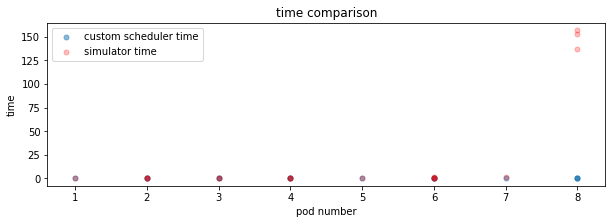

In [79]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (10,3))
# plt.plot(mt, st)
# plt.plot(p, mt, color = 'red', linewidth = 1.5, label = 'my')
# plt.plot(p, st, color = 'blue', linewidth = 1.5, label = 's')
plt.title('time comparison')
plt.scatter(p, mt,  s=25, alpha=.5, label='custom scheduler time')
plt.scatter(p, st, s = 25, c = 'red', alpha=.25, label='simulator time')
plt.xlabel('pod number')
plt.ylabel('time',rotation = 90)
plt.savefig('time_comparision.png')
plt.legend(loc='upper left')
plt.show()

In [58]:
'pod1'.split('pod')

['', '1']

In [76]:
import numpy as np

sr = []
mr = []

for r in sim_res:
    i = r['index']
#     print(i)
    res = r['result']
    m = my_res[i]
    pn = len(m['Pods'])
    nn = len(m['Nodes'])
    sm = np.zeros([nn, pn])
    for a in res:
        x = int(a[0].split('pod')[1])
        y = int(a[1].split('node')[1])
        sm[y][x] = 1.0
#     print((np.linalg.matrix_rank(sm)))
    sr.append(np.linalg.matrix_rank(sm))
    
    m_res  = np.array(m['output'])
#     print(my_res)
#     print(np.linalg.matrix_rank(m_res))
    mr.append(np.linalg.matrix_rank(m_res))
#     f = (my_res == sm)
#     print(f)

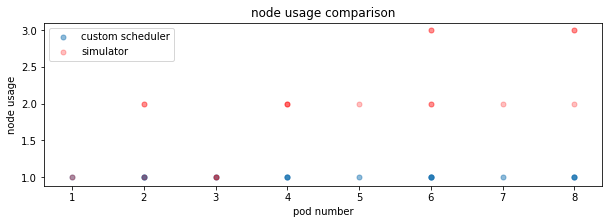

In [78]:
figure = plt.figure(figsize = (10,3))
# plt.plot(mt, st)
# plt.plot(p, mt, color = 'red', linewidth = 1.5, label = 'my')
# plt.plot(p, st, color = 'blue', linewidth = 1.5, label = 's')
plt.title('node usage comparison')
plt.scatter(p, mr,  s=25, alpha=.5, label='custom scheduler')
plt.scatter(p, sr, s = 25, c = 'red', alpha=.25, label='simulator')
plt.xlabel('pod number')
plt.ylabel('node usage',rotation = 90)
plt.savefig('node_usage_comparision.png')
plt.legend(loc='upper left')
plt.show()